## **1. LATAR BELAKANG**

Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses. Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan. Sebagai catatan, anda perlu menggunakan setidaknya 2 model Machine Learning dimana salah satunya adalah Logistic Regression

## **2. IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, recall_score, make_scorer, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
from plotly import tools

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **3. LOAD DATASETS**

In [ ]:
app_test =pd.read_csv("drive/My Drive/Colab Notebooks/[Final Task] Home Credit Scorecard Model/Dataset/application_test.csv")
app_train =pd.read_csv("drive/My Drive/Colab Notebooks/[Final Task] Home Credit Scorecard Model/Dataset/application_train.csv")
bureau_balance =pd.read_csv("drive/My Drive/Colab Notebooks/[Final Task] Home Credit Scorecard Model/Dataset/bureau_balance.csv")
bureau =pd.read_csv("drive/My Drive/Colab Notebooks/[Final Task] Home Credit Scorecard Model/Dataset/bureau.csv")
credit_card_balance =pd.read_csv("drive/My Drive/Colab Notebooks/[Final Task] Home Credit Scorecard Model/Dataset/credit_card_balance.csv")
installments_payments =pd.read_csv("drive/My Drive/Colab Notebooks/[Final Task] Home Credit Scorecard Model/Dataset/installments_payments.csv")
POS_CASH_balance =pd.read_csv("drive/My Drive/Colab Notebooks/[Final Task] Home Credit Scorecard Model/Dataset/POS_CASH_balance.csv")
previous_application =pd.read_csv("drive/My Drive/Colab Notebooks/[Final Task] Home Credit Scorecard Model/Dataset/previous_application.csv")

## **4. EXPLORATORY DATA ANALYSIS**

In [ ]:
print('Size of application_train data', app_train.shape)
print('Size of application_test data', app_test.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of bureau data', bureau.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of previous_application data', previous_application.shape)

Size of application_train data (307511, 122)
Size of application_test data (48744, 121)
Size of bureau_balance data (27299925, 3)
Size of bureau data (1716428, 17)
Size of credit_card_balance data (3840312, 23)
Size of installments_payments data (13605401, 8)
Size of POS_CASH_balance data (10001358, 8)
Size of previous_application data (1670214, 37)


### app_train

In [ ]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Target Variable Distribution
import plotly.express as px

TARGET = app_train['TARGET'].value_counts().reset_index()
TARGET.columns = ['TARGET', 'Count']

custom_color_scale = [
    [0, '#BF3131'],
    [1, '#EAD196']
]


fig = px.bar(TARGET, x='TARGET', y='Count',
             labels={'TARGET': "TARGET", 'Count': 'Count'},
             title="Distribution of TARGET VARIABLE",
             color='TARGET',
             color_continuous_scale=custom_color_scale)

fig.show()

Pada distribusi variabel TARGET ditemukan adanya ketidakseimbangan kelas, yakni kelas 0 sebagai kelas mayoritas dengan jumlah data sebanyak 282.686, sedangkan kelas 1 sebagai kelas minoritasnya.

In [ ]:
# Gender Distribution
def plot_gender_distribution(app_train):

    fig1 = px.histogram(app_train, x='CODE_GENDER',
                        title='Gender Distribution',
                        labels={'CODE_GENDER': 'Gender', 'count': 'Count'},
                        color_discrete_sequence=['#BF3131','#EAD196'])


    fig2 = px.histogram(app_train, x='CODE_GENDER', color='TARGET',
                        title='Gender Distribution by Target',
                        labels={'CODE_GENDER': 'Gender', 'count': 'Count'},
                        barmode='group',
                        color_discrete_map={0: '#EAD196', 1: '#BF3131'})

    fig1.update_layout(height=350, showlegend=False)
    fig2.update_layout(height=350, showlegend=True)

    fig1.show()
    fig2.show()

plot_gender_distribution(app_train)


Output hidden; open in https://colab.research.google.com to view.

Secara keseluruhan pelanggan Home Credit didominasi oleh Perempuan. Keduanya baik laki - laki ataupun perempuan mayoritas berada pada kelas 0.

In [ ]:
# Family Status Distribution
def plot_gender_distribution(app_train):

    fig1 = px.histogram(app_train, x='NAME_FAMILY_STATUS',
                        title='Family Status Distribution',
                        labels={'NAME_FAMILY_STATUS': 'Status', 'count': 'Count'},
                        color_discrete_sequence=['#BF3131','#EAD196'])


    fig2 = px.histogram(app_train, x='NAME_FAMILY_STATUS', color='TARGET',
                        title='Family Status Distribution by Target',
                        labels={'NAME_FAMILY_STATUS': 'Status', 'count': 'Count'},
                        barmode='group',
                        color_discrete_map={0: '#EAD196', 1: '#BF3131'})

    fig1.update_layout(height=350, showlegend=False)
    fig2.update_layout(height=350, showlegend=True)

    fig1.show()
    fig2.show()

plot_gender_distribution(app_train)

Output hidden; open in https://colab.research.google.com to view.

Jika dilihat dari statusnya, mayoritas pelanggan telah menikah kemudian diikuti oleh kelompok pelanggan yang belum menikah/single.

In [ ]:
# Suite Type and Income Type
def plot_gender_distribution(app_train):

    fig1 = px.histogram(app_train, x='NAME_TYPE_SUITE',
                        title='Type Suite Distribution',
                        labels={'NAME_TYPE_SUITE': 'Type', 'count': 'Count'},
                        color_discrete_sequence=['#BF3131'])


    fig2 = px.histogram(app_train, x='NAME_INCOME_TYPE',
                        title='Income Suite Distribution',
                        labels={'NAME_INCOME_TYPE': 'Type', 'count': 'Count'},
                        color_discrete_sequence=['#EAD196'])

    fig1.update_layout(height=350, showlegend=False)
    fig2.update_layout(height=350, showlegend=True)

    fig1.show()
    fig2.show()

plot_gender_distribution(app_train)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Target Varies with Suite and Income Type
def plot_gender_distribution(app_train):

    fig1 = px.histogram(app_train, x='NAME_TYPE_SUITE', color='TARGET',
                        title='Suite Type Distribution by TARGET',
                        labels={'NAME_TYPE_SUITE': 'Type', 'count': 'Count'},
                        barmode='group',
                        color_discrete_map={0: '#EAD196', 1: '#BF3131'})


    fig2 = px.histogram(app_train, x='NAME_INCOME_TYPE', color='TARGET',
                        title='Income Type Distribution by Target',
                        labels={'NAME_INCOME_TYPE': 'Type', 'count': 'Count'},
                        barmode='group',
                        color_discrete_map={0: '#EAD196', 1: '#BF3131'})

    fig1.update_layout(height=350, showlegend=False)
    fig2.update_layout(height=350, showlegend=True)

    fig1.show()
    fig2.show()

plot_gender_distribution(app_train)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Contract Type
import plotly.express as px
contract_type_counts = app_train['NAME_CONTRACT_TYPE'].value_counts().reset_index()
contract_type_counts.columns = ['NAME_CONTRACT_TYPE', 'count']

fig = px.pie(contract_type_counts,
             names='NAME_CONTRACT_TYPE',
             values='count',
             title='Distribution of NAME_CONTRACT_TYPE',
             labels={'NAME_CONTRACT_TYPE': 'Contract Type', 'count': 'Count'},
             color_discrete_sequence=['#BF3131', '#EAD196'])

fig.show()

Secara keseluruhan, mayoritas pelanggan melakukan kontrak dengan tipe Cash Loans sebanyak 278.232

In [ ]:
# Education Type Distribution
def plot_gender_distribution(app_train):

    fig1 = px.histogram(app_train, x='NAME_EDUCATION_TYPE', color='TARGET',
                        title='Education Type Distribution by TARGET',
                        labels={'NAME_EDUCATION_TYPE': 'Type', 'count': 'Count'},
                        barmode='group',
                        color_discrete_map={0: '#EAD196', 1: '#BF3131'})

    fig1.update_layout(height=350, showlegend=False)

    fig1.show()

plot_gender_distribution(app_train)

Output hidden; open in https://colab.research.google.com to view.

Pelanggan Home Credit didominasi oleh orang - orang yang berpendidikan tingkat Secondary/Secondary Special, dimana mayoritasnya ada pada kelas 0.

In [ ]:
# Organization and Occupation Type Distribution
def plot_gender_distribution(app_train):

    fig1 = px.histogram(app_train, x='ORGANIZATION_TYPE', color='TARGET',
                        title='Organization Type Distribution by TARGET',
                        labels={'ORGANIZATION_TYPE': 'Type', 'count': 'Count'},
                        barmode='group',
                        color_discrete_map={0: '#EAD196', 1: '#BF3131'})

    fig2 = px.histogram(app_train, x='OCCUPATION_TYPE', color='TARGET',
                        title='Occupation Type Distribution by TARGET',
                        labels={'OCCUPATION_TYPE': 'Type', 'count': 'Count'},
                        barmode='group',
                        color_discrete_map={0: '#EAD196', 1: '#BF3131'})

    fig1.update_layout(height=350, showlegend=False)
    fig2.update_layout(height=350, showlegend=False)

    fig1.show()
    fig2.show()

plot_gender_distribution(app_train)

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-29-634c6d6e445c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




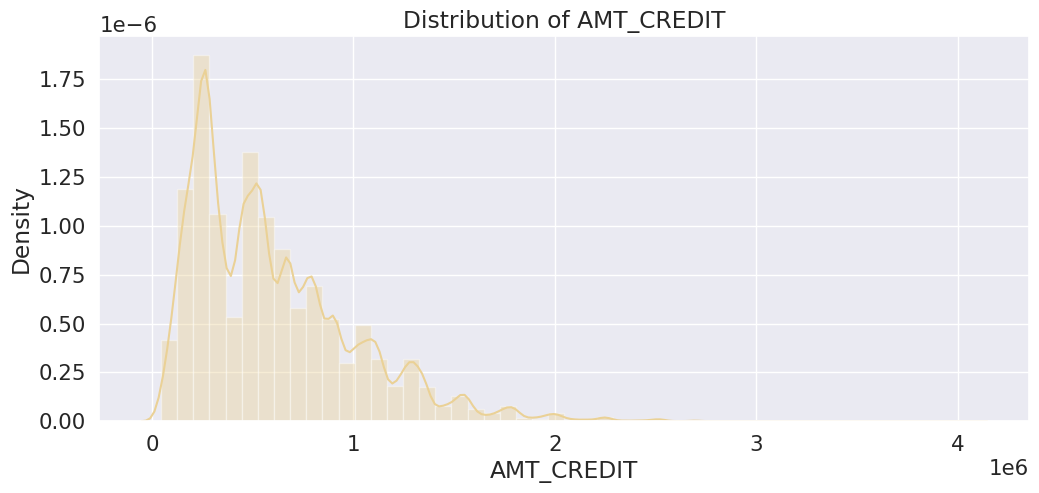

In [ ]:
# AMT CREDIT Distribution
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app_train["AMT_CREDIT"],  color='#EAD196')

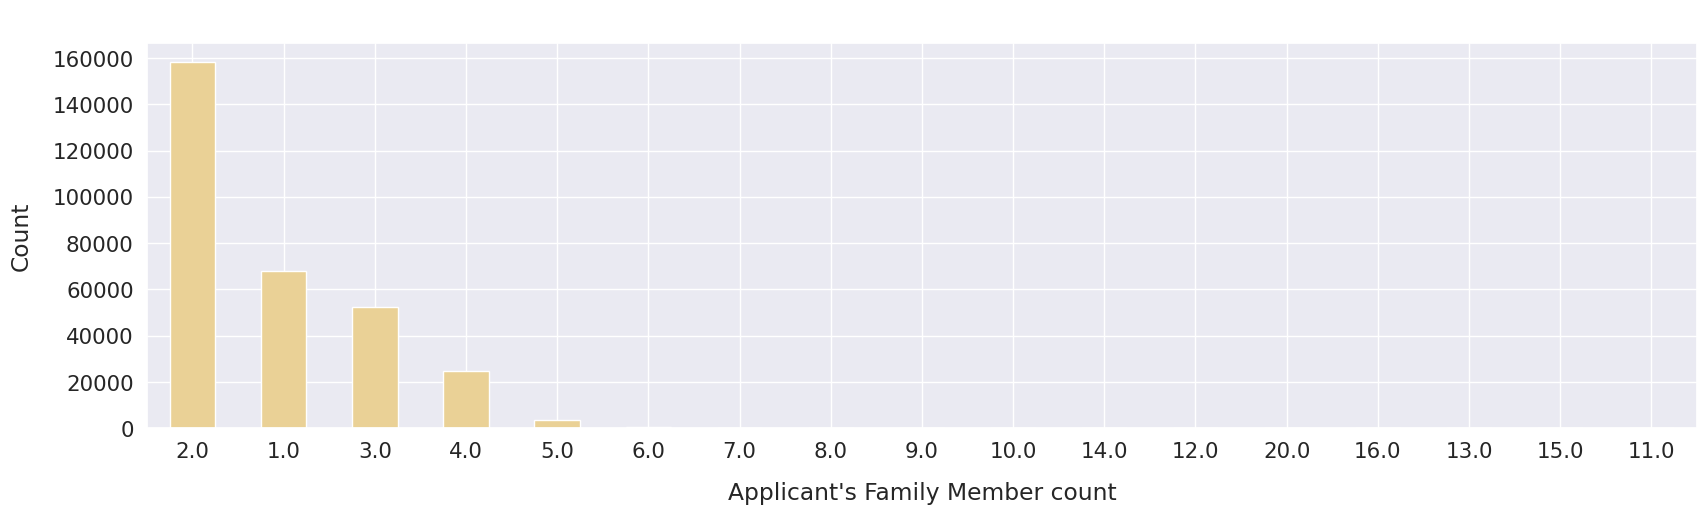

In [ ]:
# Applicant's Family member distribution
sns.set(font_scale=1.4)
app_train['CNT_FAM_MEMBERS'].value_counts().plot(kind='bar', figsize=(20, 5), rot=0, color='#EAD196')
plt.xlabel("Applicant's Family Member count", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title(" ", y=1.02);

Mayoritas pelanggan berasal dari keluarga yang berjumlah 2 orang, kemudian diikut oleh keluarga berjumlah 1 orang.

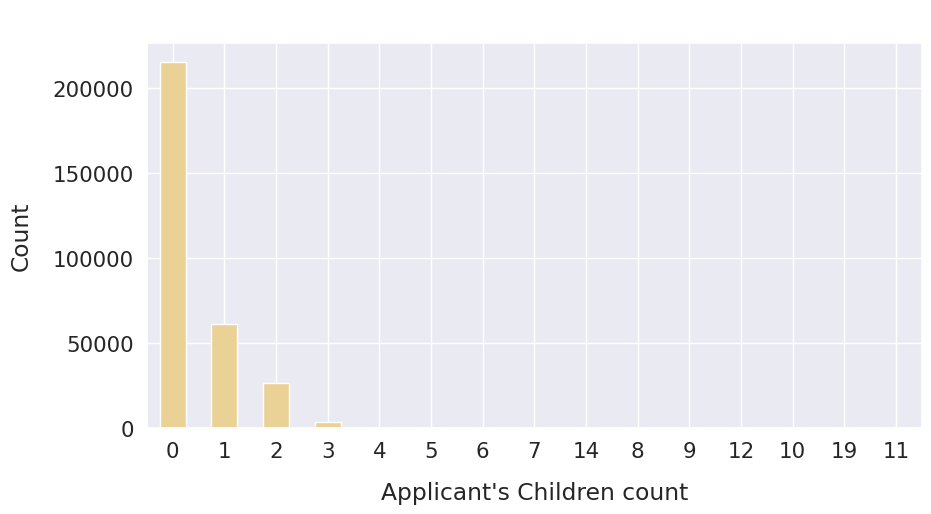

In [ ]:
# Applicant's children distribution
sns.set(font_scale=1.4)
app_train['CNT_CHILDREN'].value_counts().plot(kind='bar', figsize=(10, 5), rot=0, color='#EAD196')
plt.xlabel("Applicant's Children count", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title(" ", y=1.02);

Pelanggan Home Credit mayoritas tidak atau belum memiliki anak, jika memiliki anak rata - rata berjumlah 1 atau 2 anak.

### Bureau

In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


### Bureau Balance

In [ ]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


### Credit Card Balance

In [ ]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


### POS CASH Balance

In [ ]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


### Prev Application

In [ ]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Contract Status Distribution
contract_type_counts = previous_application['NAME_CONTRACT_STATUS'].value_counts().reset_index()
contract_type_counts.columns = ['NAME_CONTRACT_STATUS', 'count']

fig = px.pie(contract_type_counts,
             names='NAME_CONTRACT_STATUS',
             values='count',
             title='Distribution of NAME_CONTRACT_STATUS',
             labels={'NAME_CONTRACT_STATUS': 'Status', 'count': 'Count'},
              color_discrete_sequence=['#7D0A0A', '#BF3131', '#EAD196', '#F3EDC8'])

fig.show()

In [ ]:
# Suite Type Distribution
import plotly.express as px
contract_type_counts = previous_application['NAME_TYPE_SUITE'].value_counts().reset_index()
contract_type_counts.columns = ['NAME_TYPE_SUITE', 'count']

fig = px.pie(contract_type_counts,
             names='NAME_TYPE_SUITE',
             values='count',
             title='Distribution of NAME_TYPE_SUITE',
             labels={'NAME_TYPE_SUITE': 'Type', 'count': 'Count'},
             color_discrete_sequence=['#7D0A0A', '#BF3131', '#EAD196', '#F3EDC8', '#EEE2DE', '#EEE2DE', '#EEE2DE'])

fig.show()

In [ ]:
# Client Type Distribution
import plotly.express as px
contract_type_counts = previous_application['NAME_CLIENT_TYPE'].value_counts().reset_index()
contract_type_counts.columns = ['NAME_CLIENT_TYPE', 'count']

fig = px.pie(contract_type_counts,
             names='NAME_CLIENT_TYPE',
             values='count',
             title='Distribution of NAME_CLIENT_TYPE',
             labels={'NAME_CLIENT_TYPE': 'Type', 'count': 'Count'},
             color_discrete_sequence=['#7D0A0A', '#BF3131', '#EAD196', '#F3EDC8'])

fig.show()

In [ ]:
# Channel Type Distribution
import plotly.express as px
contract_type_counts = previous_application['CHANNEL_TYPE'].value_counts().reset_index()
contract_type_counts.columns = ['CHANNEL_TYPE', 'count']

fig = px.pie(contract_type_counts,
             names='CHANNEL_TYPE',
             values='count',
             title='Distribution of CHANNEL_TYPE',
             labels={'CHANNEL_TYPE': 'Type', 'count': 'Count'},
             color_discrete_sequence=['#7D0A0A', '#BF3131', '#EAD196', '#F3EDC8', '#EEE2DE', '#EEE2DE', '#EEE2DE'])

fig.show()

### Installments Payments

In [ ]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


## **5. DATA CLEANING**

### 5.1 Handling Missing Values

#### App Train

In [ ]:
app_train.isnull().values.any()

True

In [ ]:
from sklearn.impute import SimpleImputer

# Assuming app_train is already loaded

# Identify columns with missing values
missing_values = app_train.isnull().sum()
missing_cols = missing_values[missing_values > 0].index.tolist()

# Differentiate between numerical and categorical columns
num_cols = app_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = app_train.select_dtypes(include=['object']).columns.tolist()

# Create imputers for numerical and categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation
app_train[num_cols] = num_imputer.fit_transform(app_train[num_cols])
app_train[cat_cols] = cat_imputer.fit_transform(app_train[cat_cols])

# Verify that there are no missing values left
print(app_train.isnull().sum().sum())  # Should output 0 if all missing values are handled

0


#### App Test

In [ ]:
app_test.isnull().values.any()

True

In [ ]:
# Identify columns with missing values
missing_values = app_test.isnull().sum()
missing_cols = missing_values[missing_values > 0].index.tolist()

# Differentiate between numerical and categorical columns
num_cols = app_test.select_dtypes(include=['number']).columns.tolist()
cat_cols = app_test.select_dtypes(include=['object']).columns.tolist()

# Create imputers for numerical and categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation
app_test[num_cols] = num_imputer.fit_transform(app_test[num_cols])
app_test[cat_cols] = cat_imputer.fit_transform(app_test[cat_cols])

# Verify that there are no missing values left
print(app_test.isnull().sum().sum())

0


#### Bureau

In [ ]:
bureau.isnull().values.any()

True

In [ ]:
# Identify columns with missing values
missing_values = bureau.isnull().sum()
missing_cols = missing_values[missing_values > 0].index.tolist()

# Differentiate between numerical and categorical columns
num_cols = bureau.select_dtypes(include=['number']).columns.tolist()
cat_cols = bureau.select_dtypes(include=['object']).columns.tolist()

# Create imputers for numerical and categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation
bureau[num_cols] = num_imputer.fit_transform(bureau[num_cols])
bureau[cat_cols] = cat_imputer.fit_transform(bureau[cat_cols])

# Verify that there are no missing values left
print(bureau.isnull().sum().sum())

0


#### Bureau balance

In [ ]:
bureau_balance.isnull().values.any()

False

#### Credit Card Balance

In [ ]:
credit_card_balance.isnull().values.any()

True

In [ ]:
# Identify columns with missing values
missing_values = credit_card_balance.isnull().sum()
missing_cols = missing_values[missing_values > 0].index.tolist()

# Differentiate between numerical and categorical columns
num_cols = credit_card_balance.select_dtypes(include=['number']).columns.tolist()
cat_cols = credit_card_balance.select_dtypes(include=['object']).columns.tolist()

# Create imputers for numerical and categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation
credit_card_balance[num_cols] = num_imputer.fit_transform(credit_card_balance[num_cols])
credit_card_balance[cat_cols] = cat_imputer.fit_transform(credit_card_balance[cat_cols])

# Verify that there are no missing values left
print(credit_card_balance.isnull().sum().sum())

0


#### POS CASH Balance

In [ ]:
POS_CASH_balance.isnull().values.any()

True

In [ ]:
# Identify columns with missing values
missing_values = POS_CASH_balance.isnull().sum()
missing_cols = missing_values[missing_values > 0].index.tolist()

# Differentiate between numerical and categorical columns
num_cols = POS_CASH_balance.select_dtypes(include=['number']).columns.tolist()
cat_cols = POS_CASH_balance.select_dtypes(include=['object']).columns.tolist()

# Create imputers for numerical and categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation
POS_CASH_balance[num_cols] = num_imputer.fit_transform(POS_CASH_balance[num_cols])
POS_CASH_balance[cat_cols] = cat_imputer.fit_transform(POS_CASH_balance[cat_cols])

# Verify that there are no missing values left
print(POS_CASH_balance.isnull().sum().sum())

0


#### Prev Application

In [ ]:
previous_application.isnull().values.any()

True

In [ ]:
# Identify columns with missing values
missing_values = previous_application.isnull().sum()
missing_cols = missing_values[missing_values > 0].index.tolist()

# Differentiate between numerical and categorical columns
num_cols = previous_application.select_dtypes(include=['number']).columns.tolist()
cat_cols = previous_application.select_dtypes(include=['object']).columns.tolist()

# Create imputers for numerical and categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation
previous_application[num_cols] = num_imputer.fit_transform(previous_application[num_cols])
previous_application[cat_cols] = cat_imputer.fit_transform(previous_application[cat_cols])

# Verify that there are no missing values left
print(previous_application.isnull().sum().sum())

0


#### Installation Payments


In [ ]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
installments_payments.isnull().values.any()

True

In [ ]:
# Identify columns with missing values
missing_values = installments_payments.isnull().sum()
missing_cols = missing_values[missing_values > 0].index.tolist()

# Differentiate between numerical and categorical columns
num_cols = installments_payments.select_dtypes(include=['number']).columns.tolist()
cat_cols = installments_payments.select_dtypes(include=['object']).columns.tolist()

# Create imputers for numerical and categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to numerical columns
installments_payments[num_cols] = num_imputer.fit_transform(installments_payments[num_cols])

# Apply imputation to categorical columns
for col in cat_cols:
    installments_payments[col] = cat_imputer.fit_transform(installments_payments[[col]])

# Verify that there are no missing values left
print(installments_payments.isnull().sum().sum())

0


### 5.2 Handling Categorical Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = app_train.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cat = encoder.fit_transform(app_train[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols))

num_cols = app_train.select_dtypes(include=['number']).columns.tolist()
app_train_encoded = pd.concat([app_train[num_cols], encoded_cat_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



## **6. MODELLING & EVALUATION**

### 6.1 Modelling

In [ ]:
app_train_encoded.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
app_train_encoded['TARGET'].value_counts()

TARGET
0.0    282686
1.0     24825
Name: count, dtype: int64

In [ ]:
X = app_train_encoded.drop("TARGET", axis=1)
y = app_train_encoded["TARGET"]

### 6.2 Feature Selection (Fitur Based)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menghitung skor korelasi (misalnya, ANOVA F-statistic) untuk setiap fitur
selector = SelectKBest(score_func=f_classif, k=10)  # Ganti 'k' dengan jumlah fitur yang ingin dipilih
X_new = selector.fit_transform(X_train, y_train)

# Indeks fitur yang terpilih
selected_feature_indices = selector.get_support(indices=True)

# Daftar nama fitur yang terpilih
selected_feature_names = X.columns[selected_feature_indices]

# Dataframe baru dengan fitur terpilih
X_filtered = X[selected_feature_names]

# Hasil seleksi fitur
print("Fitur Terpilih:")
print(selected_feature_names)

Fitur Terpilih:
Index(['DAYS_BIRTH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_M', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education'],
      dtype='object')


In [ ]:
X_filtered

,DAYS_BIRTH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,CODE_GENDER_M,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education
0,-9461.0,2.0,2.0,0.083037,0.262949,0.139376,-1134.0,1.0,1.0,0.0
1,-16765.0,1.0,1.0,0.311267,0.622246,0.510853,-828.0,0.0,0.0,1.0
2,-19046.0,2.0,2.0,0.502130,0.555912,0.729567,-815.0,1.0,1.0,0.0
3,-19005.0,2.0,2.0,0.502130,0.650442,0.510853,-617.0,0.0,1.0,0.0
4,-19932.0,2.0,2.0,0.502130,0.322738,0.510853,-1106.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
307506,-9327.0,1.0,1.0,0.145570,0.681632,0.510853,-273.0,1.0,1.0,0.0
307507,-20775.0,2.0,2.0,0.502130,0.115992,0.510853,0.0,0.0,0.0,0.0
307508,-14966.0,3.0,3.0,0.744026,0.535722,0.218859,-1909.0,0.0,1.0,1.0
307509,-11961.0,2.0,2.0,0.502130,0.514163,0.661024,-322.0,0.0,0.0,0.0


In [ ]:
# Menambahkan fitur target dari y_resampled ke dalam pca_df
fb_combined_df = pd.concat([X_filtered, y], axis = 1)

# Menampilkan DataFrame hasilnya
print("\nDataframe Setelah Menambahkan Fitur Target:")
fb_combined_df


Dataframe Setelah Menambahkan Fitur Target:


,DAYS_BIRTH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,CODE_GENDER_M,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,TARGET
0,-9461.0,2.0,2.0,0.083037,0.262949,0.139376,-1134.0,1.0,1.0,0.0,1.0
1,-16765.0,1.0,1.0,0.311267,0.622246,0.510853,-828.0,0.0,0.0,1.0,0.0
2,-19046.0,2.0,2.0,0.502130,0.555912,0.729567,-815.0,1.0,1.0,0.0,0.0
3,-19005.0,2.0,2.0,0.502130,0.650442,0.510853,-617.0,0.0,1.0,0.0,0.0
4,-19932.0,2.0,2.0,0.502130,0.322738,0.510853,-1106.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
307506,-9327.0,1.0,1.0,0.145570,0.681632,0.510853,-273.0,1.0,1.0,0.0,0.0
307507,-20775.0,2.0,2.0,0.502130,0.115992,0.510853,0.0,0.0,0.0,0.0,0.0
307508,-14966.0,3.0,3.0,0.744026,0.535722,0.218859,-1909.0,0.0,1.0,1.0,0.0
307509,-11961.0,2.0,2.0,0.502130,0.514163,0.661024,-322.0,0.0,0.0,0.0,1.0


In [ ]:
# Memisahkan fitur dan target
X = fb_combined_df.drop(columns=['TARGET'])
y = fb_combined_df['TARGET']

In [ ]:
# standardize the data

sc = StandardScaler()
X = sc.fit_transform(X)

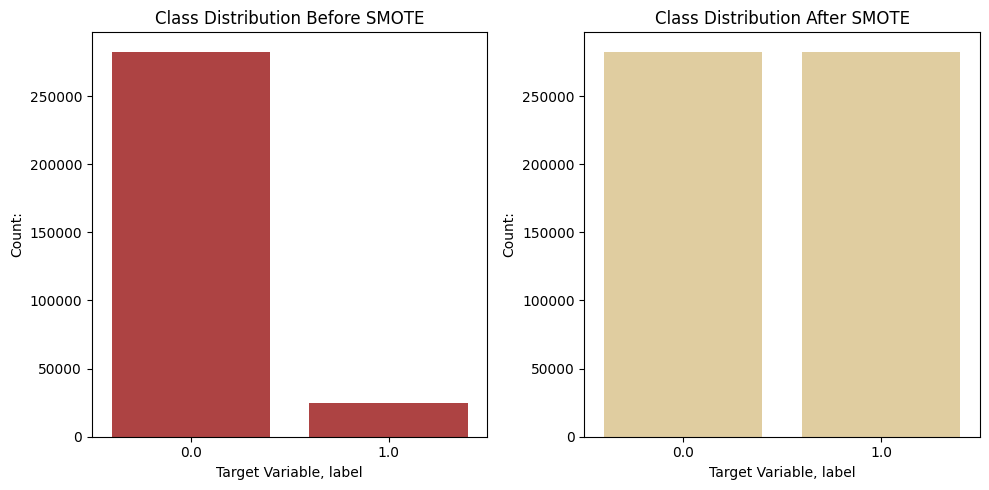

In [ ]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(X, y)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Before SMOTE
sns.countplot(x=y, ax=axes[0], color='#BF3131')
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Target Variable, label')
axes[0].set_ylabel('Count:')

# After SMOTE
sns.countplot(x=y_resampled, ax=axes[1], color='#EAD196')
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Target Variable, label')
axes[1].set_ylabel('Count:')

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((452297, 10), (113075, 10))

In [ ]:
def evaluate_model(true, predicted, is_regression=False):
    if is_regression:
        mae = mean_absolute_error(true, predicted)
        mse = mean_squared_error(true, predicted)
        rmse = np.sqrt(mean_squared_error(true, predicted))
        r2_square = r2_score(true, predicted)
        return mae, rmse, r2_square
    else:
        accuracy = accuracy_score(true, predicted)
        precision = precision_score(true, predicted)
        recall = recall_score(true, predicted)
        f1 = f1_score(true, predicted)
        roc_auc = roc_auc_score(true, predicted)
        return accuracy, precision, recall, f1, roc_auc

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    #"Random Forest Classifier": RandomForestClassifier(),
    #"K-Neighbors Classifier": KNeighborsClassifier()
}

model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy, precision, recall, f1, roc_auc=evaluate_model(y_test, y_test_pred, is_regression=False)


    print(model_name)
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- F1 Score: {:.4f}".format(f1))
    print("- ROC AUC Score: {:.4f}".format(roc_auc))
    print('='*35)
    print('\n')

    model_list.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

Logistic Regression
Model performance for Test set
- Accuracy: 0.6678
- Precision: 0.6708
- Recall: 0.6591
- F1 Score: 0.6649
- ROC AUC Score: 0.6678




### **6.3 Evaluation**

              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67     56536
         1.0       0.67      0.66      0.66     56539

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



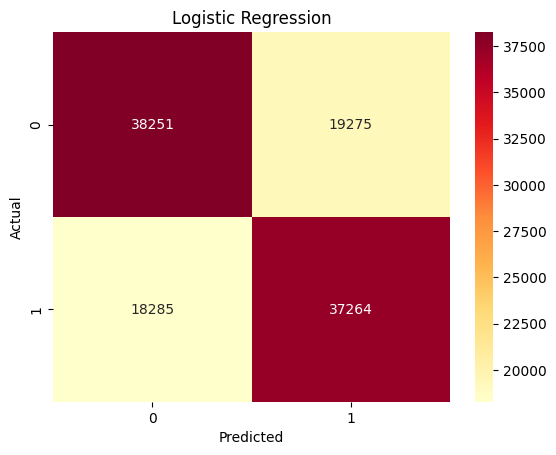

In [ ]:
# Classification Report Logistic Regression
model=LogisticRegression()
clf=model.fit(X_train, y_train)
pred=clf.predict(X_test)
print(classification_report(y_test,pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(pred,y_test),annot = True,fmt = "d", cmap='YlOrRd')
plt.title("Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 6.4 Testing Dataset

#### Handling Categorical Features

In [ ]:
cat_cols = app_test.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cat = encoder.fit_transform(app_test[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols))

num_cols = app_test.select_dtypes(include=['number']).columns.tolist()
app_test_encoded = pd.concat([app_test[num_cols], encoded_cat_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



#### Hyperparameter

In [ ]:
log_reg = LogisticRegression()

param_grid = {
    'log_reg__C': [0.1, 1, 10, 100],
    'log_reg__penalty': ['l1', 'l2'],
    'log_reg__solver': ['liblinear']
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', log_reg)
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_reg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.1, 1, 10, 100],
                         'log_reg__penalty': ['l1', 'l2'],
                         'log_reg__solver': ['liblinear']},
             scoring='accuracy')

In [ ]:
print("Best Params: ", grid_search.best_params_)
print("Best f1_score: ", grid_search.best_score_)

Best Params:  {'log_reg__C': 100, 'log_reg__penalty': 'l1', 'log_reg__solver': 'liblinear'}
Best f1_score:  0.6725359723068284


In [ ]:
features = [
    "DAYS_BIRTH",
    "REGION_RATING_CLIENT",
    "REGION_RATING_CLIENT_W_CITY",
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
    "DAYS_LAST_PHONE_CHANGE",
    "CODE_GENDER_M",
    "NAME_INCOME_TYPE_Working",
    "NAME_EDUCATION_TYPE_Higher education"
]

# Predict on the testing dataset using the specified 10 features
predictions = grid_search.predict(app_test_encoded[features])

# Extract the 'SK_ID_CURR' column
id = app_test_encoded["SK_ID_CURR"]

# Create a DataFrame for submission
app_test_predict_LR = pd.DataFrame({
    "SK_ID_CURR": id,
    "TARGET": predictions
})

app_test_predict_LR

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



,SK_ID_CURR,TARGET
0,100001.0,0.0
1,100005.0,0.0
2,100013.0,0.0
3,100028.0,0.0
4,100038.0,0.0
...,...,...
48739,456221.0,0.0
48740,456222.0,0.0
48741,456223.0,0.0
48742,456224.0,0.0


In [ ]:
# submit the predictions
app_test_predict_LR.to_csv('/content/drive/My Drive/Colab Notebooks/[Final Task] Home Credit Scorecard Model/app_test_predict_LR.csv', index=False)